In [0]:
import numpy as np
import tensorflow as tf
import librosa
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Add,Conv2D,MaxPooling1D,MaxPooling2D
from keras.utils import np_utils
from IPython.display import Audio
from scipy.io import wavfile
import pandas as pd
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import random
import IPython.display as ipd
from keras import models


In [37]:
!git clone https://github.com/sanath493/dl-as1-audio.git

fatal: destination path 'dl-as1-audio' already exists and is not an empty directory.


In [0]:
from zipfile import ZipFile
file_name = "dl-as1-audio/data.zip"
with ZipFile(file_name , 'r') as zip:
  zip.extractall()

In [0]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
S=np.transpose(S)
S=np.abs(S)
 
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
X=np.transpose(X)
X=np.abs(X)

sl, sr=librosa.load('test_x_01.wav', sr=None)
Y=librosa.stft(sl, n_fft=1024, hop_length=512)
Y=np.transpose(Y)
Y=np.abs(Y)


sa, sr=librosa.load('test_x_02.wav', sr=None)
Z=librosa.stft(sa, n_fft=1024, hop_length=512)
Z=np.transpose(Z)
Z=np.abs(Z)

In [40]:
sa.shape

(194353,)

In [41]:
Z.shape

(380, 513)

In [0]:
nx,ny=Y.shape
px,py=Z.shape

In [43]:
len(X[0])

513

In [0]:
def augment(input):
  E=[]
  for i in range(len(X[0])):
    E.append(random.uniform(0, 0.000001))
  E=np.asarray(E)
  return E


In [0]:
D=[]
for j in range(19):
  D.append(augment(1))
D=np.asarray(D)
X=np.concatenate((D,X), axis=0)
A=[]
for i in range(len(X)-19):
  A.append(X[i:20+i])
dataset_X=np.asarray(A)

In [46]:
print(dataset_X.shape)


(2459, 20, 513)


In [0]:
B=[]
D=[]
for j in range(19):
  D.append(augment(1))
D=np.asarray(D)
Y=np.concatenate((D, Y), axis=0)
for i in range(len(Y)-19):
  B.append(Y[i:20+i])
dataset_Y=np.asarray(B)


In [0]:
C=[]
D=[]
for j in range(19):
  D.append(augment(1))
D=np.asarray(D)
Z=np.concatenate((D, Z), axis=0)
for i in range(len(Z)-19):
  C.append(Z[i:20+i])
dataset_Z=np.asarray(C)

In [49]:
dataset_Z.shape

(380, 20, 513)

In [50]:
dataset_Y.shape

(142, 20, 513)

In [0]:

dataset_X=dataset_X.reshape(2459,20,513,1)
dataset_Y=dataset_Y.reshape(142,20,513,1)
dataset_Z=dataset_Z.reshape(px,20,py,1)

In [52]:
model =Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=(20,513,1),kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(2))
#model.add(Dropout(rate=0.2))
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1),activation='relu'))
#model.add(MaxPooling2D(2))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(513,activation=tf.nn.relu))

model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
model.summary()
model.fit(dataset_X,S,epochs = 50,batch_size=100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 509, 32)       832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 254, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 250, 32)        25632     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 250, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 513)               16416513  
Total params: 16,442,977
Trainable params: 16,442,977
Non-trainable params: 0
__________________________________________

In [67]:
S.shape

(2459, 513)

In [0]:
ny_pred=model.predict(dataset_X)
K0=np.transpose(ny_pred)
sn_1, sr=librosa.load('train_dirty_male.wav', sr=None)
O1=librosa.stft(sn_1, n_fft=1024, hop_length=512)
O2=np.abs(O1)
w=(O1/O2)
w.shape
o_1=np.multiply(w,K0)
Op_1=librosa.istft(o_1,hop_length=512)

In [54]:
nume=pow(sn_1,2)
deno=[]
for i in range(len(Op_1)):
  deno.append(sn_1[i]-Op_1[i])
deno=np.asarray(deno)
nume=nume.sum()
deno=pow(deno,2)
deno=deno.sum()
out=(nume/deno)
snr=10*np.log10(out)
snr

6.517179608345032

In [0]:
y_pred1 = model.predict(dataset_Y)

ny_pred1=[]
for i in range(len(y_pred1)):
  ny_pred1.append(y_pred1[j][0])
ny_pred1=np.asarray(ny_pred1)

In [0]:
K=np.transpose(y_pred1)
sp, sr=librosa.load('test_x_01.wav', sr=None)
Z1=librosa.stft(sp, n_fft=1024, hop_length=512)
Z2=np.abs(Z1)
z=(Z1/Z2)
z.shape
o=np.multiply(z,K)
Op=librosa.istft(o,hop_length=512)

In [0]:
librosa.output.write_wav('test_s_01_recons1_2dcnn.wav', Op, sr)

In [58]:
ipd.Audio('test_x_01.wav')

In [59]:
ipd.Audio('test_s_01_recons1_2dcnn.wav')

In [0]:
y_pred2 = model.predict(dataset_Z)
K1=np.transpose(y_pred2)
sa, sr=librosa.load('test_x_02.wav', sr=None)
Y1=librosa.stft(sa, n_fft=1024, hop_length=512)
Y2=np.abs(Y1)
C=(Y1/Y2)
C.shape
L=np.multiply(C,K1)
Op1=librosa.istft(L,hop_length=512)

In [0]:
librosa.output.write_wav('test_s_01_recons2_2dcnn.wav', Op1, sr)

In [62]:
ipd.Audio('test_x_02.wav')

In [63]:
ipd.Audio('test_s_01_recons2_2dcnn.wav')

In [0]:
import librosa.display

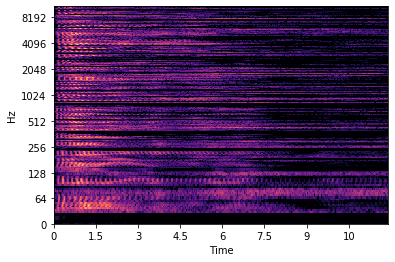

In [65]:
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')

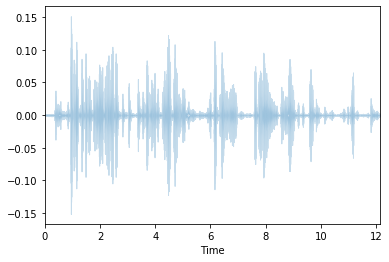

In [66]:
librosa.display.waveplot(Op1, sr=sr, alpha=0.25)